In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [4]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,45.510838,1132.989990
2010-01-05,45.525723,1136.520020
2010-01-06,45.309784,1137.140015
2010-01-07,45.064072,1141.689941
2010-01-08,45.004490,1144.979980


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-01-29,93.540001,2640.000000
2019-01-30,94.519997,2681.050049
2019-01-31,96.470001,2704.100098
2019-02-01,97.470001,2706.530029
2019-02-05,97.660004,2729.429932


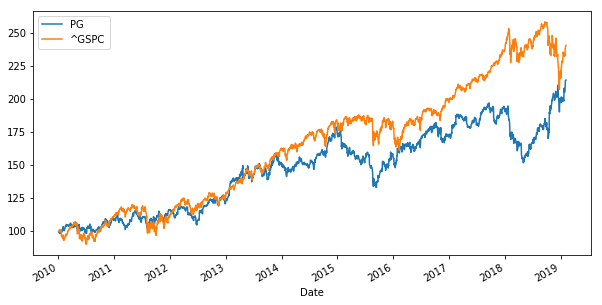

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.083502
^GSPC    0.096154
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.021374,0.011683
^GSPC,0.011683,0.022495


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.532802
^GSPC,0.532802,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([0.62494601, 0.223386  ])

In [13]:
arr[0] + arr[1]

0.8483320078203151

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.76761541, 0.23238459])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.08644189435560486

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.017977305454256277

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.13407947439580853

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.08445973848769973,
  0.09465311419904361,
  0.08688519664254303,
  0.08492069610542369,
  0.08905148959314078,
  0.09041971777048222,
  0.08624039343860482,
  0.09478544869454558,
  0.0939975712445254,
  0.09490773034419231,
  0.0893262567248497,
  0.0907022885688011,
  0.08820916262038386,
  0.09025932640497936,
  0.09032147085958508,
  0.09108394159903556,
  0.0877904689922115,
  0.08799006440016209,
  0.0911289374354518,
  0.08953088696621753,
  0.08907938626118475,
  0.08701093336832119,
  0.08628785268233159,
  0.0900398127663683,
  0.09402642585340987,
  0.08595543692370781,
  0.08463702993163393,
  0.08614099584637437,
  0.09523508058413828,
  0.09298566838764213,
  0.08717404657632734,
  0.08776683524800347,
  0.09195868237498561,
  0.09420136654792902,
  0.08469155800859579,
  0.08939493620476681,
  0.09185492290558567,
  0.08705311598199449,
  0.08715378371643573,
  0.09020244976988127,
  0.09479485577356228,
  0.08864786730789864,
  0.09113660306190369,
  0.0929467261713

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.08940066, 0.08938807, 0.09313669, 0.08963229, 0.09261475,
        0.08778874, 0.08928526, 0.0859052 , 0.09035742, 0.08659252,
        0.09293394, 0.09145331, 0.08736617, 0.09014068, 0.08790625,
        0.0898365 , 0.09080135, 0.08902164, 0.09560093, 0.09308266,
        0.08443123, 0.09457634, 0.09473482, 0.09007522, 0.09148244,
        0.08894662, 0.08779015, 0.08679505, 0.09053612, 0.08351064,
        0.09091384, 0.08948242, 0.08834259, 0.09035382, 0.09361975,
        0.08914967, 0.08916253, 0.09008063, 0.08665393, 0.0901195 ,
        0.08870095, 0.08488976, 0.08861752, 0.08788236, 0.08568953,
        0.09092973, 0.0837454 , 0.09246306, 0.09365669, 0.09103986,
        0.09373059, 0.08820075, 0.09608704, 0.08350759, 0.08982074,
        0.09352458, 0.09139684, 0.08825444, 0.08848311, 0.09316579,
        0.08841791, 0.08873913, 0.09426992, 0.09198898, 0.08757795,
        0.08634441, 0.08924333, 0.08854195, 0.08851296, 0.08668355,
        0.09052372, 0.08548128, 0.09447771, 0.09